# Explore BRFSS getting started
BRFSS dataset getting started

In [1]:
# Importeer benodige packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from scipy.stats import chi2_contingency
plt.style.use('ggplot')

# Data laden

In [2]:
### Pas dit aan voor je eigen machine 
data_dir = '/home/pieter/projects/brfss/data'  # Linux
# r'C:/pieter/projects/bfrss/data'             # Windows

In [44]:
# BFRSS enquete data raw --> gewoon om even te kijken hoe de gecodeerde data er uit zien,
# verder doen we er hierna niks meer mee. Als je zelf met de ruwe data wilt werken, laad
# dan LLCP2019.csv
data_raw = pd.read_csv(join(data_dir, 'brfss2019_sample_raw.csv'), sep='|')
data_raw.head()

,SEXVAR,GENHLTH,HLTHPLN1,MEDCOST,CHECKUP1,BPHIGH4,MARITAL,EDUCA,RENTHOM1,EMPLOY1,WEIGHT2,SMOKE100,SMOKDAY2,ALCDAY5,FRUIT2
0,2,4,1,2,1,3,1,5,1,1.0,240.0,2.0,NaN,203.0,304.0
1,1,3,1,2,8,3,1,6,1,7.0,155.0,1.0,3.0,224.0,101.0
2,1,7,1,2,3,1,5,6,1,2.0,160.0,2.0,NaN,107.0,106.0
3,1,3,1,2,1,1,1,6,1,7.0,155.0,2.0,NaN,888.0,202.0
4,2,3,1,2,1,3,3,6,1,7.0,130.0,2.0,NaN,204.0,101.0


In [43]:
# BFRSS enquete data decoded
data = pd.read_csv(join(data_dir, 'brfss_level_1.csv'), sep='|')
data.head()

,Sex_of_Respondent,General_Health,Have_any_health_care_coverage,Could_Not_See_Doctor_Because_of_Cost,Length_of_time_since_last_routine_checkup,Ever_Told_Blood_Pressure_High,Marital_Status,Education_Level,Own_or_Rent_Home,Employment_Status,Reported_Weight_in_Kilograms,Smoked_at_Least_100_Cigarettes,Frequency_of_Days_Now_Smoking,Days_in_past_30_had_alcoholic_beverage,How_many_times_did_you_eat_fruit_per_month?,ID
0,M,Very good,Yes,No,"[0, 1) years",Not asked or Missing,Divorced,6 College graduate,Group home,Retired,113.4,Yes,Every day,25.0,30.0,6
1,F,Very good,Yes,No,"[0, 1) years",Yes,Widowed,5 Some college or technical school,Group home,A homemaker,72.57,No,Not asked or Missing,0,30.0,166
2,F,Good,No,No,"[1, 2) years",Not asked or Missing,Married,4 High school graduate,Group home,A homemaker,Refused,No,Not asked or Missing,0,Never,271
3,M,Good,Yes,No,"[1, 2) years",Borderline high,Married,4 High school graduate,Rent,Retired,127.01,Yes,Not at all,0,56.0,296
4,F,Excellent,Yes,No,"[0, 1) years",Not asked or Missing,Married,6 College graduate,Group home,Employed for wages,68.04,Yes,Not at all,5.0,60.0,373


# Data exploreren

In [9]:
# maak een samenvatting van alle data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sex_of_Respondent,10000,2,F,5498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
General_Health,10000,7,Very good,3331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Have_any_health_care_coverage,10000,4,Yes,9099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Could_Not_See_Doctor_Because_of_Cost,10000,4,No,8914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Length_of_time_since_last_routine_checkup,10000,7,"[0, 1) years",8005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ever_Told_Blood_Pressure_High,10000,6,Not asked or Missing,5782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,10000,8,Married,5156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,10000,7,6 College graduate,3765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Own_or_Rent_Home,10000,6,Group home,7045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment_Status,10000,10,Employed for wages,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Hoe zijn de respondenten verdeeld over de verschillende gezondheidscategorieen?
100 * data.General_Health.value_counts(normalize=True)

Very good              33.31
Good                   31.01
Excellent              16.05
Fair                   14.19
Poor                    5.19
Don’t know/Not Sure     0.20
Refused                 0.05
Name: General_Health, dtype: float64

<AxesSubplot:>

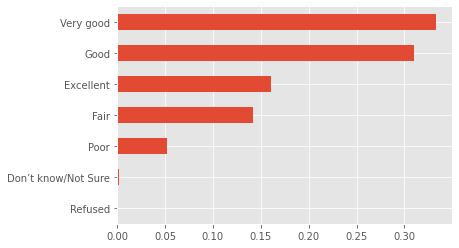

In [12]:
data.General_Health.value_counts(normalize=True).iloc[::-1].plot(kind='barh')

<AxesSubplot:ylabel='Sex_of_Respondent'>

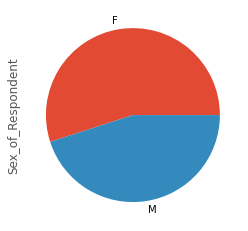

In [13]:
# Hoeveel respondenten zijn man / vrouw?
data.Sex_of_Respondent.value_counts().plot(kind='pie')

In [14]:
# Is hoeverre is er een relatie tussen algehele gezondheid en geslacht?
ctab = pd.crosstab(data.General_Health, data.Sex_of_Respondent)
display(ctab)
chi2, p, dof, expected = chi2_contingency(ctab)
print('p-value Chi2 test: {:5.2f}'.format(p))

Sex_of_Respondent,F,M
General_Health,,
Don’t know/Not Sure,8,12
Excellent,880,725
Fair,805,614
Good,1677,1424
Poor,296,223
Refused,4,1
Very good,1828,1503


p-value Chi2 test:  0.34


In [15]:
# Hoe zijn de respondenten verdeeld over de laatste keer dat ze hun gezonheid lieten checken ("routine checkup")?
100 * data.General_Health.value_counts(normalize=True)

Very good              33.31
Good                   31.01
Excellent              16.05
Fair                   14.19
Poor                    5.19
Don’t know/Not Sure     0.20
Refused                 0.05
Name: General_Health, dtype: float64

In [16]:
# Voelen respondenten die zich beter/slechter naarmate het langer geleden is dat ze hun gezondheid lieten checken?
ctab = pd.crosstab(data.General_Health, data.Length_of_time_since_last_routine_checkup)
display(ctab)
chi2, p, dof, expected = chi2_contingency(ctab)
print('p-value Chi2 test: {:5.2f}'.format(p))

Length_of_time_since_last_routine_checkup,5+ years,Don’t know/Not sure,Never,Refused,"[0, 1) years","[1, 2) years","[2, 5) years"
General_Health,,,,,,,
Don’t know/Not Sure,1,1,0,0,15,3,0
Excellent,81,23,16,3,1183,186,113
Fair,45,11,10,3,1203,98,49
Good,150,30,18,1,2495,272,135
Poor,18,9,5,1,454,24,8
Refused,0,0,0,0,5,0,0
Very good,144,24,15,2,2650,348,148


p-value Chi2 test:  0.00


In [17]:
# Hoe zijn de respondenten verdeeld naar huwelijkse staat?
100 * data.Marital_Status.value_counts(normalize=True)

Married                            51.56
Never married                      16.91
Divorced                           13.22
Widowed                            11.76
A member of an unmarried couple     3.65
Separated                           2.14
Refused                             0.75
Not asked or Missing                0.01
Name: Marital_Status, dtype: float64

In [18]:
# In hoeverre is er een relatie tussen algehele gezondheid en huwelijkse staat?
ctab = pd.crosstab(data.General_Health, data.Marital_Status)
display(ctab)
chi2, p, dof, expected = chi2_contingency(ctab)
print('p-value Chi2 test: {:5.2f}'.format(p))

Marital_Status,A member of an unmarried couple,Divorced,Married,Never married,Not asked or Missing,Refused,Separated,Widowed
General_Health,,,,,,,,
Don’t know/Not Sure,2,5,7,3,0,0,1,2
Excellent,74,173,921,286,0,17,15,119
Fair,50,236,587,245,0,8,55,238
Good,120,435,1514,551,1,18,76,386
Poor,9,111,208,68,0,4,23,96
Refused,0,1,2,0,0,0,0,2
Very good,110,361,1917,538,0,28,44,333


p-value Chi2 test:  0.00


In [19]:
# Hoe zijn de respondenten verdeeld naar Employment Status?
100 * data.Employment_Status.value_counts(normalize=True)

Employed for wages                  40.91
Retired                             30.02
Self-employed                        8.66
Unable to work                       7.00
A homemaker                          5.18
A student                            2.82
Out of work for 1 year or more       1.99
Out of work for less than 1 year     1.74
Refused                              0.92
Not asked or Missing                 0.76
Name: Employment_Status, dtype: float64

In [20]:
# In hoeverre is er een verband tussen algehele gezondheid en Employment status
ctab = pd.crosstab(data.General_Health, data.Employment_Status)
display(ctab)
chi2, p, dof, expected = chi2_contingency(ctab)
print('p-value Chi2 test: {:5.2f}'.format(p))

Employment_Status,A homemaker,A student,Employed for wages,Not asked or Missing,Out of work for 1 year or more,Out of work for less than 1 year,Refused,Retired,Self-employed,Unable to work
General_Health,,,,,,,,,,
Don’t know/Not Sure,0,0,7,0,0,1,0,7,1,4
Excellent,89,66,802,11,22,18,9,373,189,26
Fair,92,19,353,15,56,32,15,502,90,245
Good,175,78,1294,18,69,54,41,954,263,155
Poor,21,0,61,1,11,9,4,188,10,214
Refused,0,0,0,1,0,0,0,4,0,0
Very good,141,119,1574,30,41,60,23,974,313,56


p-value Chi2 test:  0.00


In [21]:
pd.DataFrame(expected).round(1)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.6,8.2,0.2,0.4,0.3,0.2,6.0,1.7,1.4
1,83.1,45.3,656.6,12.2,31.9,27.9,14.8,481.8,139.0,112.4
2,73.5,40.0,580.5,10.8,28.2,24.7,13.1,426.0,122.9,99.3
3,160.6,87.4,1268.6,23.6,61.7,54.0,28.5,930.9,268.5,217.1
4,26.9,14.6,212.3,3.9,10.3,9.0,4.8,155.8,44.9,36.3
5,0.3,0.1,2.0,0.0,0.1,0.1,0.0,1.5,0.4,0.4
6,172.5,93.9,1362.7,25.3,66.3,58.0,30.6,1000.0,288.5,233.2


In [22]:
# Histogram van de gewichten van de respondenten
data = data.apply(pd.to_numeric, errors='coerce').fillna(data)  # Convert str to numeric if possible

<AxesSubplot:ylabel='Frequency'>

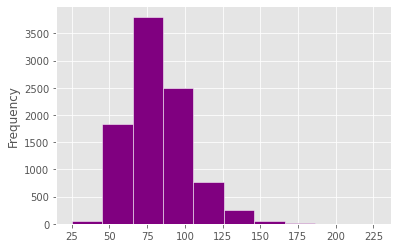

In [28]:
is_float = data.Reported_Weight_in_Kilograms.map(lambda x: type(x)==float)
data.Reported_Weight_in_Kilograms[is_float].plot(kind='hist', edgecolor='white', color='purple')

In [31]:
# Relatie tussen gewicht en algehele gezondheid

relevant_data = data[['Reported_Weight_in_Kilograms', 'General_Health']][is_float]
summary = relevant_data.groupby('General_Health')['Reported_Weight_in_Kilograms'].agg(['sum', 'count'])
summary['avg'] = summary['sum'] / summary['count']
summary

,sum,count,avg
General_Health,,,
Don’t know/Not Sure,1176.17,15,78.411333
Excellent,114774.96,1521,75.460197
Fair,113745.41,1316,86.432682
Good,243448.69,2861,85.092167
Poor,41554.00,480,86.570833
Refused,231.33,3,77.110000
Very good,249771.65,3108,80.364109


In [32]:
# Hoeveel roken de respondenten?

data.Smoked_at_Least_100_Cigarettes.value_counts()

No                      5579
Yes                     3959
Not asked or Missing     383
Don’t know/Not Sure       64
Refused                   15
Name: Smoked_at_Least_100_Cigarettes, dtype: int64

In [33]:
# Verband tussen algehele gezondheid en roken zichtbaar?
ctab = pd.crosstab(data.General_Health, data.Smoked_at_Least_100_Cigarettes)
display(ctab)
chi2, p, dof, expected = chi2_contingency(ctab)
print('p-value Chi2 test: {:5.2f}'.format(p))

Smoked_at_Least_100_Cigarettes,Don’t know/Not Sure,No,Not asked or Missing,Refused,Yes
General_Health,,,,,
Don’t know/Not Sure,2,6,2,0,10
Excellent,7,1096,59,1,442
Fair,9,631,60,4,715
Good,24,1642,118,3,1314
Poor,3,185,23,0,308
Refused,0,2,2,0,1
Very good,19,2017,119,7,1169


p-value Chi2 test:  0.00


In [34]:
pd.DataFrame(expected).round(1)

,0,1,2,3,4
0,0.1,11.2,0.8,0.0,7.9
1,10.3,895.4,61.5,2.4,635.4
2,9.1,791.7,54.3,2.1,561.8
3,19.8,1730.0,118.8,4.7,1227.7
4,3.3,289.6,19.9,0.8,205.5
5,0.0,2.8,0.2,0.0,2.0
6,21.3,1858.4,127.6,5.0,1318.7


<AxesSubplot:ylabel='Frequency'>

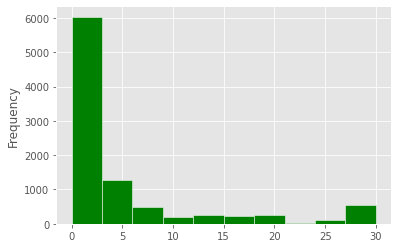

In [35]:
# Hoeveel drinken de respondenten?
is_float = data.Days_in_past_30_had_alcoholic_beverage.map(lambda x: type(x)==float)
data.Days_in_past_30_had_alcoholic_beverage[is_float].plot(kind='hist', edgecolor='white', color='green')

In [36]:
# Relatie drankgebruik met algehele gezondheid zichtbaar?

relevant_data = data[['Days_in_past_30_had_alcoholic_beverage', 'General_Health']][is_float]
summary = relevant_data.groupby('General_Health')['Days_in_past_30_had_alcoholic_beverage'].agg(['sum', 'count'])
summary['avg'] = summary['sum'] / summary['count']
summary

,sum,count,avg
General_Health,,,
Don’t know/Not Sure,82.0,17,4.823529
Excellent,8547.0,1517,5.634146
Fair,4150.0,1339,3.099328
Good,12818.0,2927,4.379228
Poor,1123.0,487,2.305955
Refused,0.0,3,0.000000
Very good,17339.0,3167,5.474897


<AxesSubplot:ylabel='Frequency'>

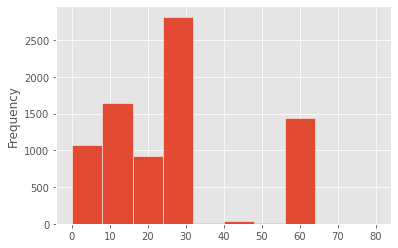

In [41]:
# Hoeveel fruit eten de respondenten?

is_float = data['How_many_times_did_you_eat_fruit_per_month?'].map(lambda x: type(x) == float)

is_plausible = (data['How_many_times_did_you_eat_fruit_per_month?'][is_float] < 90)

data['How_many_times_did_you_eat_fruit_per_month?'][is_float][is_plausible].plot(kind='hist', edgecolor='white')

In [42]:
# Relatie fruit met algehele gezondheid? 

relevant_data = data[['How_many_times_did_you_eat_fruit_per_month?', 'General_Health']][is_float][is_plausible]
summary = relevant_data.groupby('General_Health')['How_many_times_did_you_eat_fruit_per_month?'].agg(['sum', 'count'])
summary['avg'] = summary['sum'] / summary['count']
summary

,sum,count,avg
General_Health,,,
Don’t know/Not Sure,248.0,14,17.714286
Excellent,37165.0,1251,29.708233
Fair,26536.0,1108,23.949458
Good,61066.0,2452,24.904568
Poor,9554.0,405,23.590123
Refused,90.0,3,30.000000
Very good,75176.0,2712,27.719764
